The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

What is the most commonly awarded gender and birth country?

In [249]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!
data =pd.read_csv('data/nobel.csv')
top_gender = data['sex'].value_counts().index[0]
top_country = data['birth_country'].value_counts().index[0]

Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [250]:
data['winnerUS'] = data['birth_country'] == 'United States of America'

In [251]:
data['decade'] = (np.floor(data['year']/10)*10).astype(int)

In [252]:
ratio = data.groupby('decade', as_index = False)['winnerUS'].mean()

In [253]:
ratio

,decade,winnerUS
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


In [254]:
max_decade_usa = ratio[ratio['winnerUS']==ratio['winnerUS'].max()].values[0][0].astype(int)
max_decade_usa

2000

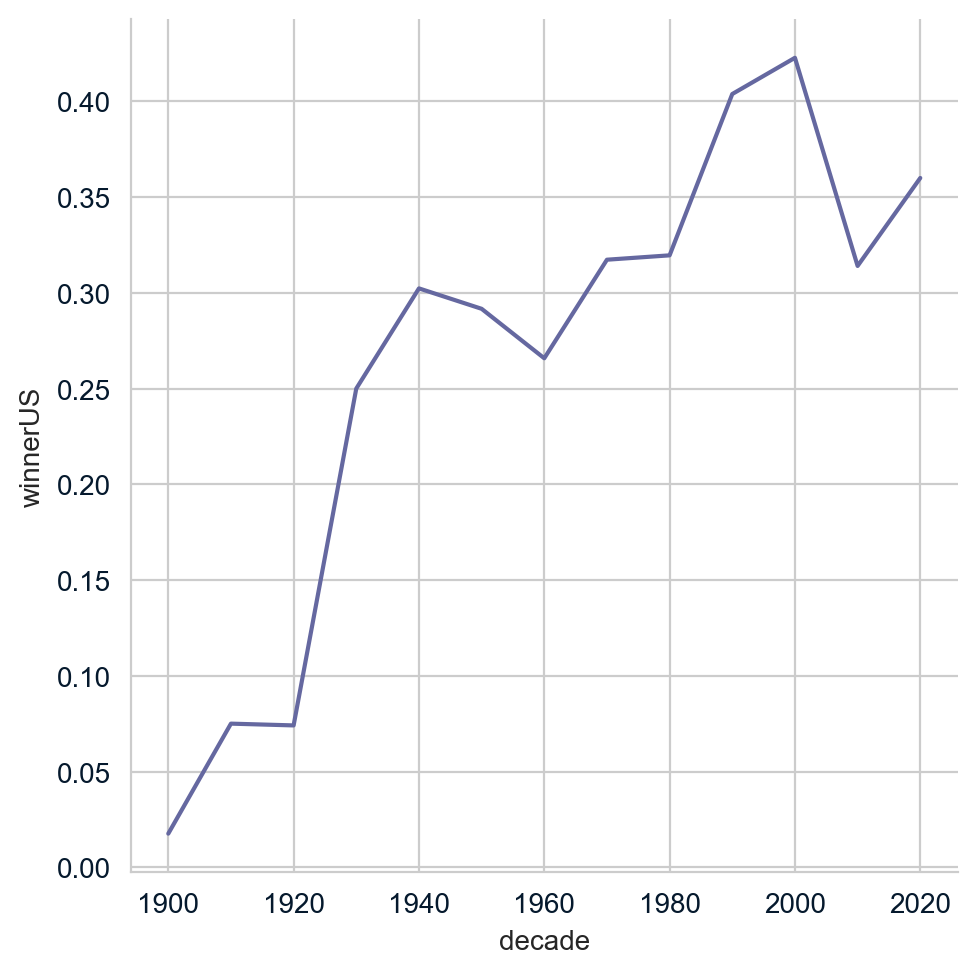

In [255]:
sns.set_style('whitegrid')
sns.relplot(kind = 'line', data = data, x = 'decade', y = 'winnerUS', ci = None)
plt.show()

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [256]:
data['prop_female'] = data['sex'] == 'Female'

In [257]:
ratio_prop_female = data.groupby(['decade','category'], as_index=False)['prop_female'].mean()

In [258]:
max_female = ratio_prop_female[ratio_prop_female['prop_female'] == ratio_prop_female['prop_female'].max()]
max_female_dict = {max_female['decade'].values[0]: max_female['category'].values[0]}
max_female_dict

{2020: 'Literature'}

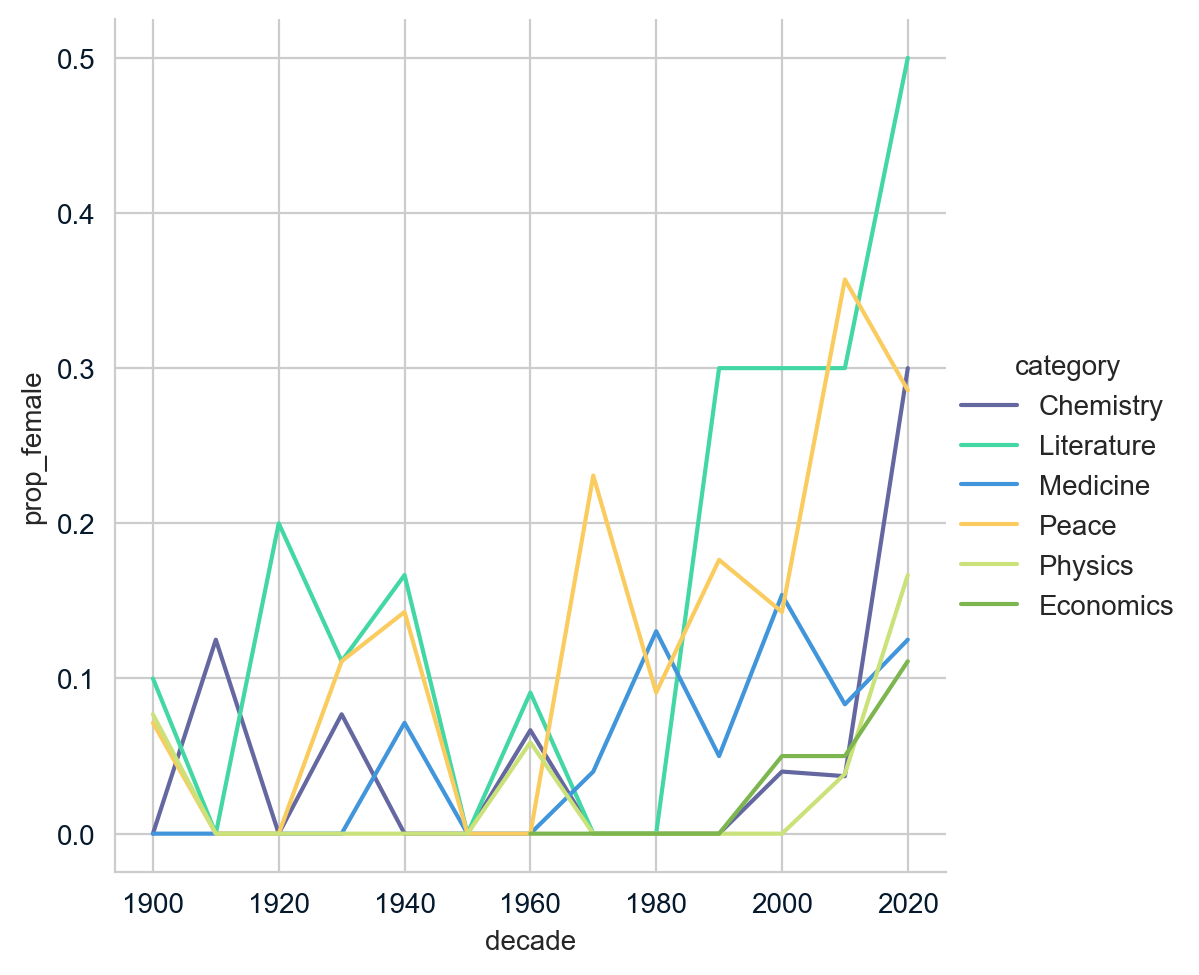

In [259]:
sns.set_style('whitegrid')
sns.relplot(data = data, kind = 'line', x = 'decade',y='prop_female', ci = None, hue = 'category')
plt.show()

Who was the first woman to receive a Nobel Prize, and in what category?

In [260]:
first_woman = data[data['sex'] == 'Female']
first_woman.head()
first_woman_name = first_woman['full_name'].values[0]
first_woman_category = first_woman['category'].values[0]


Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [261]:
count = data['full_name'].value_counts()
repeat_list = count[count >=2]
repeat_list = list(repeat_list.index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']